# **Waze Project: User Churn**

**STAGE 4: Logistic Regression Analysis**

The team has completed a project proposal, used Python to explore and analyze Waze’s user data, created data visualisations, and conducted a hypothesis test. At stage 4, a logistic regression model must be built to predict user churn based on a variety of variables.

Task for **Stage 4**: build a binomial logistic regression model to predict user churn and evaluate its performance.

*This stage has three parts:*

**Part 1:** Imports & data loading, EDA, and check model assumptions

**Part 2:** Logistic regression model construction and evaluation

**Part 3:** Interpret model results for communication with stakeholders


## **Part 1. Imports & Data Loading, EDA, Model Assumptions**

### Imports and data loading

In [1]:
# Functional packages
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for logistic regression & confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics


In [2]:
# Load the dataset
df = pd.read_csv('waze_dataset.csv')

### EDA

An extensive EDA was carried out in stage 2. Here the data will be primarily prepared for model construction.

#### Initial inspection

In [3]:
# Check shape of DF
df.shape

(14999, 13)

In [4]:
# Generate summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
# Inspect head
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [6]:
# Drop 'ID' column
df.drop(["ID"], axis=1, inplace=True)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [7]:
# Check class balance of 'label' variable
df["label"].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

In [8]:
# Get descriptive statistics
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Potential variables with outliers:

* sessions: mean of 80, std of 80, 3rd quartile of 112, and max of 743
* drives: mean of 67, std of 65, 3rd quartile of 92, and max of 596
* total_sessions
* total_navigations_fav1
* total_navigations_fav2
* driven_km_drives
* duration_minutes_drives

#### Create features

Features are extracted that may be of interest to the stakeholder or that are needed to address the business problem.

**`km_per_driving_day`**

We know from earlier EDA that churn rate correlates with distance driven per driving day in the last month. It could be helpful tocapture this by engineering a feature called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.


In [9]:
# Create `km_per_driving_day` column
df["km_per_driving_day"] = df["driven_km_drives"]/df["drives"]

# Call `describe()` on the new column
df["km_per_driving_day"].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [10]:
# Convert NaN and inf values from infinity to zero
df["km_per_driving_day"].replace(to_replace=np.inf, value=0, inplace=True)

# Validate
df["km_per_driving_day"].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_driving_day, dtype: float64

**`professional_driver`**

A new binary feature called `professional_driver` will be extracted that is a 1 for users who had 60 or more drives *and* drove on 15+ days in the last month. This is based on domain knowledge and intuition.

The [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function will be used to create this variable. 

In [11]:
# Create `professional_driver` column
drives = df["drives"]
days = df["driving_days"]
df["professional_driver"] = np.where((drives>=60) & (days >= 15), 1, 0)

# Validate
df.head(10)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,1
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,128.186173,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,1
5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,8.749890,0
6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,2624.586414,0
7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,225.487213,0
8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,57.645864,0
9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,88.874416,0


A quick inspection of the new variable is made, checking the count of professional and non-professional drives, and the churn rate for each calculated.

In [12]:
# Check count of professionals and non-professionals
prodriver_count = df["professional_driver"].value_counts()
print(prodriver_count)

# Check in-class churn rate
prodriver_churn = df.groupby(["professional_driver"])["label"].value_counts(normalize=True)
print(prodriver_churn)

professional_driver
0    12405
1     2594
Name: count, dtype: int64
professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64


The churn rate for professional drivers is 7.6%, while the churn rate for non-professionals is 19.9%. This seems like it could add predictive signal to the model.

## **Part 2: Model Construction**

It's time to begin constructing the logistic regression model targeting the `label` variable.

### Prepare variables

In [13]:
# Verify if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  km_per_driving_day       14999 non-null  float64
 13  professional_driver      14999 non-null  int32  
dtypes: float64(4), int32(1

Since we know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, I use `dropna()` to drop the rows that are missing this data.

In [14]:
# Drop rows with missing data in `label` column
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14299 non-null  int64  
 2   drives                   14299 non-null  int64  
 3   total_sessions           14299 non-null  float64
 4   n_days_after_onboarding  14299 non-null  int64  
 5   total_navigations_fav1   14299 non-null  int64  
 6   total_navigations_fav2   14299 non-null  int64  
 7   driven_km_drives         14299 non-null  float64
 8   duration_minutes_drives  14299 non-null  float64
 9   activity_days            14299 non-null  int64  
 10  driving_days             14299 non-null  int64  
 11  device                   14299 non-null  object 
 12  km_per_driving_day       14299 non-null  float64
 13  professional_driver      14299 non-null  int32  
dtypes: float64(4), int32(1), in

#### Impute outliers

We determined that seven of the variables had outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

The outlying values will be imputed with the 95th percentile for these columns.

In [15]:
# Impute outliers
for column in ["sessions", "drives", "total_sessions", "total_navigations_fav1",
               "total_navigations_fav2", "driven_km_drives", "duration_minutes_drives"]:
    threshold = df[column].quantile(0.95)
    df.loc[df[column] > threshold, column] = threshold


In [16]:
# Verify 
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,232.269197,0.173998
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,616.197409,0.379121
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,32.486524,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,72.947059,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,179.347527,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15777.426560,1.000000


#### Encode categorical variables

To train a logistic regression model, the data type of the target `label` column needs to be changed to binary. A `0` is assigned for all `retained` users and a `1` for all churned users. This variable is saved as `label2` in order not to overwrite the original column.

In [17]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,label2
0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,1,0
1,retained,133,107,326.896596,1225,19,64,8898.716275,3160.472914,13,11,iPhone,128.186173,0,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,0,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,1,0


### Check model assumptions

The following are the assumptions for logistic regression:
1. Independent observations (This refers to how the data was collected.)
2. No extreme outliers
3. Little to no multicollinearity among X predictors
4. Linear relationship between X and the logit of y

For the first assumption, we will assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.


#### **Collinearity**

The correlation among predictor variables will be checked. First, a correlation matrix is generated from the numerical columns, and then a correlation heatmap.

In [18]:
# Generate a correlation matrix
df_numerical = df.drop(columns=['label', 'device'], axis=1)
df_numerical.corr(method='pearson')

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.316930,0.443654,0.034911
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.320554,0.444425,0.035865
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.191705,0.254433,0.024568
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.004090,0.003770,-0.129263
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.005389,-0.000224,0.052322
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.003198,0.007126,0.015032
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.225912,-0.000904,0.019767
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.169051,-0.012128,0.040407
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.005193,0.453825,-0.303851
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.004005,0.469776,-0.294259


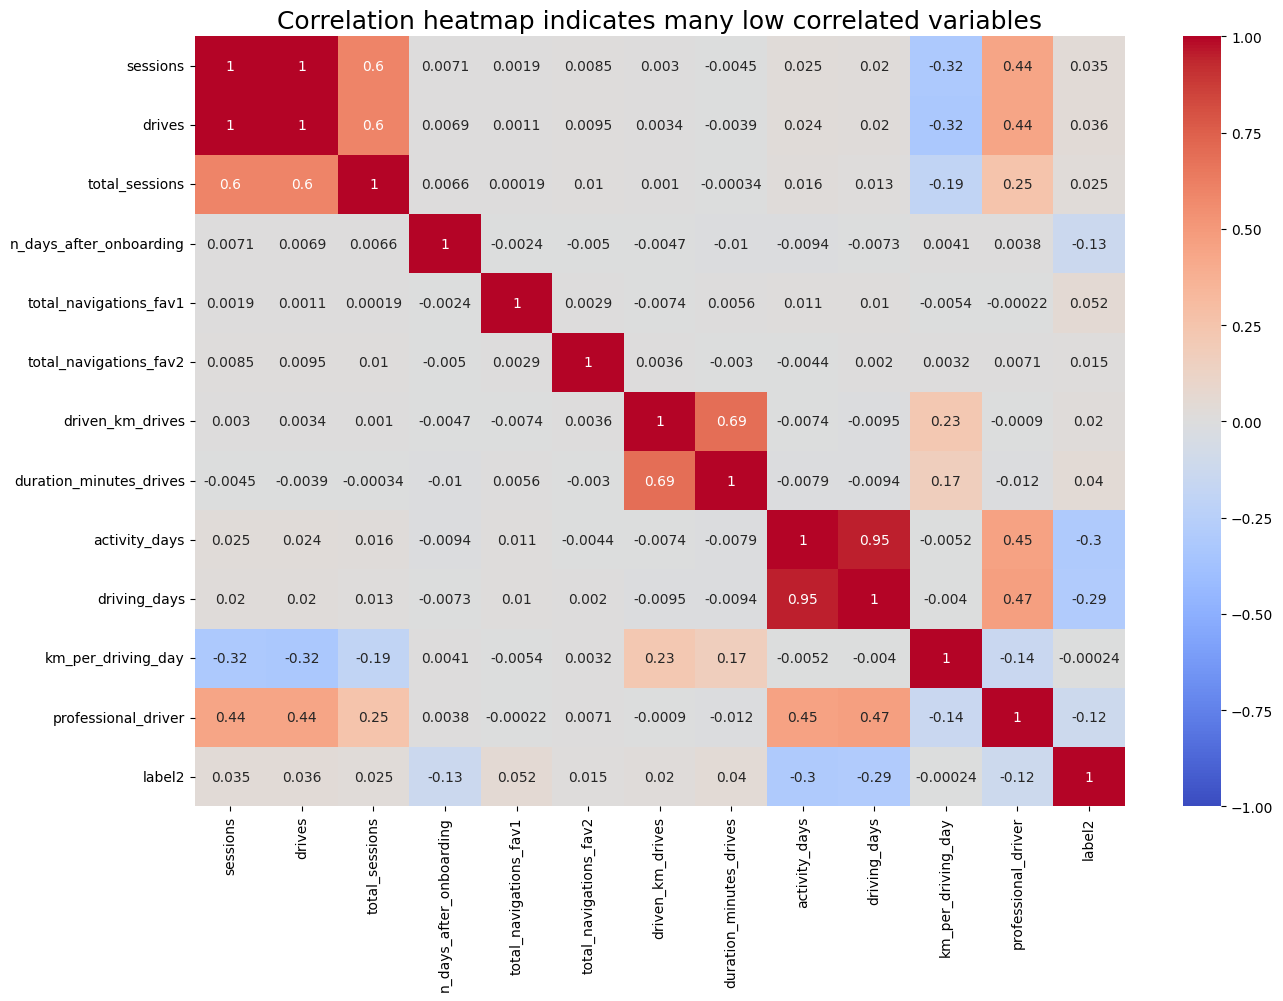

In [19]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_numerical.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

Predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7** are strongly multicollinear. Therefore, only one of these variables (`driving_days` & `activity_days` and `sessions` & `drives`) should be used in the model.

#### Create dummy variables

The `device` column needs to be dummy encoded. This new column will be called `device2` to preserve the original column's data.


In [20]:
# Create new `device2` variable
device_dummies = pd.get_dummies(df["device"])
device_dummies.drop(["Android"], axis=1, inplace=True)

df_device = pd.concat([df, device_dummies], axis=1)
df_device.rename(columns={"iPhone": "device2"}, inplace=True)

df_device.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,label2,device2
0,retained,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,11.632058,1,0,False
1,retained,133,107,326.896596,1225,19,64,8898.716275,3160.472914,13,11,iPhone,128.186173,0,0,True
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,32.201567,0,0,False
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,22.839778,0,0,True
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,58.091206,1,0,False


### Model building

#### **Assign predictor variables and target**

To construct the model we will drop the following columns for the predictor variables (`X`):

* `label` (the target with string values)
* `label2` (this is the target)
* `device` (the non-encoded categorical variable)
* `sessions` (had high multicollinearity)
* `driving_days` (had high multicollinearity)

Note that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. This is because the features kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [21]:
# Subset predictor variables
to_drop = ["label", "label2", "device", "sessions", "driving_days"]
X = df_device.drop(columns=to_drop, axis=1)

In [22]:
# Isolate target variable
y = df_device["label2"]

#### Split the data

In [23]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=55)


In [24]:
# Inspect head of predicor variables
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2
3109,17,36.713113,1931,156,7,1594.650049,760.401692,9,93.802944,0,True
6911,105,107.170143,1141,264,22,1492.833664,608.015854,5,14.217463,0,True
9158,108,190.981751,1983,115,0,2049.646745,498.727276,31,18.978211,1,True
4847,75,126.785089,3277,233,0,1526.873753,1051.832817,30,20.358317,1,True
2174,62,92.857446,551,128,0,6062.084243,4597.432430,25,97.775552,1,False


#### Run logistic regression

Scikit-learn's LogisticRegression will be used, with the `penalty` argument set to "none" since the predictors are unscaled. 

In [25]:
# Instantiate a model
model = LogisticRegression(penalty=None, max_iter=1000, random_state=11)

# Fit the model to the training sets
model_fitted = model.fit(X_train, y_train)

I'll now create a Pandas Series object with the X variables for column names and `model.coef_` for the values. The coefficients represent the change in the **log odds** of the target variable for every one unit increase in X.

In [26]:
# Get logistic regression model's coefficients for each predictor
pd.Series(model.coef_[0], index=X.columns)

drives                     0.003158
total_sessions            -0.000116
n_days_after_onboarding   -0.000385
total_navigations_fav1     0.001084
total_navigations_fav2     0.001055
driven_km_drives          -0.000039
duration_minutes_drives    0.000127
activity_days             -0.102897
km_per_driving_day         0.000131
professional_driver       -0.001515
device2                   -0.000899
dtype: float64

The model's `intercept_` attribute is called to get the intercept of the model.

In [27]:
# Get the model's intercept
model.intercept_

array([-0.00144456])

#### Check final assumption

To verify that the linear relationship between `X` and the estimated log odds, a regplot will be plotted. First, predictions will be generated and assigned to `training_probabilities` which will be used for evaluating the model's performance.

In [28]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.80212355, 0.19787645],
       [0.57616261, 0.42383739],
       [0.97147105, 0.02852895],
       ...,
       [0.76798416, 0.23201584],
       [0.82945742, 0.17054258],
       [0.92927091, 0.07072909]])

The relationship between a predictor variable and the dependent variable does not need to be linear in a logistic regression, but the logit of the dependent variable should have a linear relationship with the predictor.

$$
logit(p) = ln(\frac{p}{1-p})
$$

The `X` training set will be copied and a new `logit` column joined to it. This is used to plot a regplot for the target and each predictor variable by writing a function to call for each variable in the `X` data.

In [29]:
# Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# Create a new `logit` column in the `logit_data` df
logit_data["logit"] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

# Inspect the head
logit_data.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,professional_driver,device2,logit
3109,17,36.713113,1931,156,7,1594.650049,760.401692,9,93.802944,0,True,-1.399620
6911,105,107.170143,1141,264,22,1492.833664,608.015854,5,14.217463,0,True,-0.307040
9158,108,190.981751,1983,115,0,2049.646745,498.727276,31,18.978211,1,True,-3.527892
4847,75,126.785089,3277,233,0,1526.873753,1051.832817,30,20.358317,1,True,-3.801594
2174,62,92.857446,551,128,0,6062.084243,4597.432430,25,97.775552,1,False,-2.105259


In [30]:
# Define a function to quickly plot regplots for each predictor variable
def rplot(variable):
    plt.figure(figsize=(4, 3))
    sns.regplot(x=variable, y="logit", data=logit_data, scatter_kws={"s": 2, "alpha": 0.5})
    plt.title(f"Logit of '{variable}'")
    plt.show()

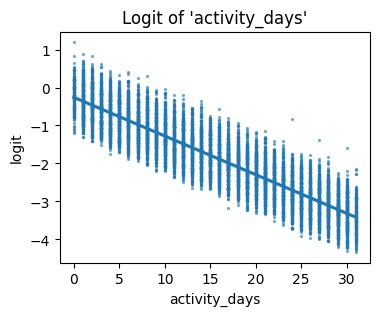

In [31]:
# Plot regplot of `activity_days` logit
rplot("activity_days")

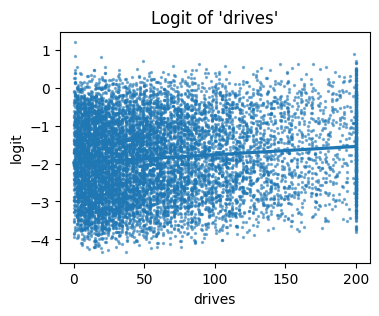

In [32]:
# Plot regplot of `drives` logit
rplot("drives")

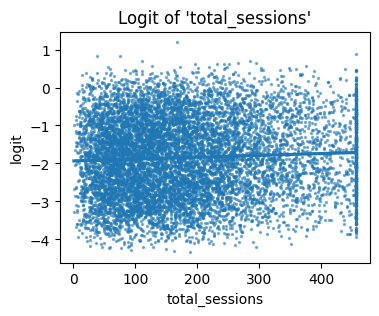

In [33]:
# Plot regplot of `total_sessions` logit
rplot("total_sessions")

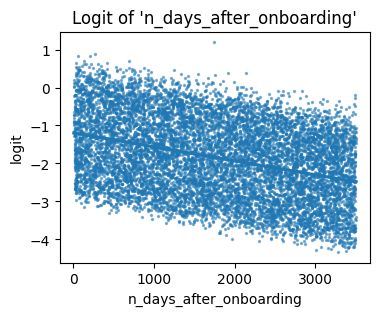

In [34]:
# Plot regplot of `n_days_after_onboarding` logit
rplot("n_days_after_onboarding")

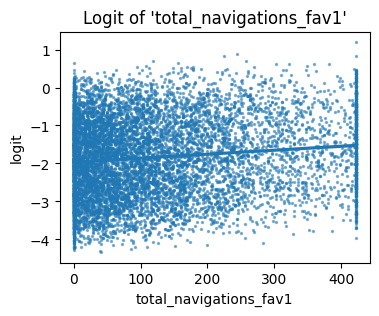

In [35]:
# Plot regplot of `total_navigations_fav1` logit
rplot("total_navigations_fav1")

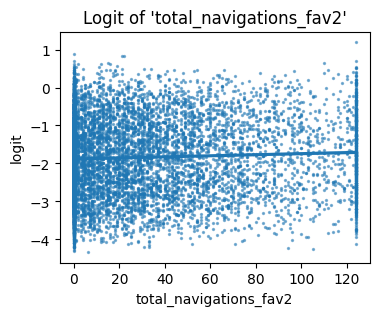

In [36]:
# Plot regplot of `total_navigations_fav2` logit
rplot("total_navigations_fav2")

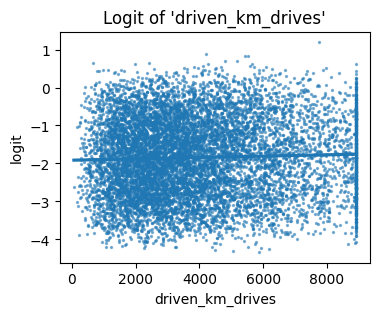

In [37]:
# Plot regplot of `driven_km_drives` logit
rplot("driven_km_drives")

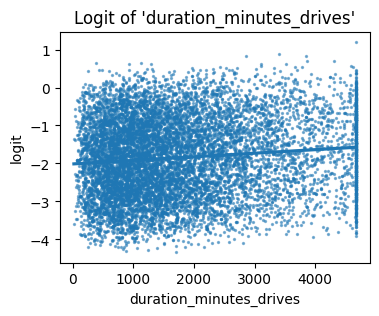

In [38]:
# Plot regplot of `duration_minutes_drives` logit
rplot("duration_minutes_drives")

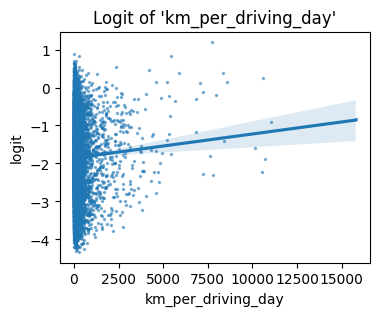

In [39]:
# Plot regplot of `km_per_driving_day` logit
rplot("km_per_driving_day")

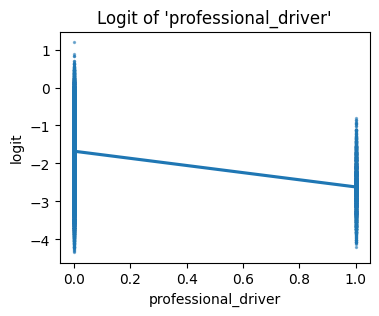

In [40]:
# Plot regplot of `professional_driver` logit
rplot("professional_driver")

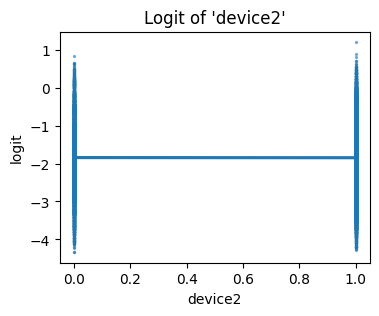

In [41]:
# Plot regplot of `device2` logit
rplot("device2")

### Results and evaluation

The linearity assumption is met for some variables (`activity_days`, `n_days_after_onboarding`) but not for the others. Still, the model can be evaluated to get a better understanding of how reliable one could expect it to be despite a non-perfect linearity assumption.

Predictions will be made from the test data, which will be used to get the model's performance metrics for evaluation.

In [42]:
# Generate predictions on X_test
y_pred = model.predict(X_test)

count_ones = np.sum(y_pred == 1)
count_zeros = np.sum(y_pred == 0)

print("Churn (1) count:", count_ones)
print("Retained (0) count:", count_zeros)

Churn (1) count: 116
Retained (0) count: 4174


In [43]:
# Generate a report on the model's classification performance
target_labels = ["retained", "churned"]
print(metrics.classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.99      0.90      3529
     churned       0.55      0.08      0.15       761

    accuracy                           0.83      4290
   macro avg       0.69      0.53      0.52      4290
weighted avg       0.78      0.83      0.77      4290



The model's precision is weak, but its recall is extremely poor. A poor recall score means that the model generates a high level of false negatives, making it unreliable at predicting users who will churn.

**Display results with a confusion matrix**

In [44]:
# Generate a confusion matrix of the model's performance
cm = metrics.confusion_matrix(y_test, y_pred)

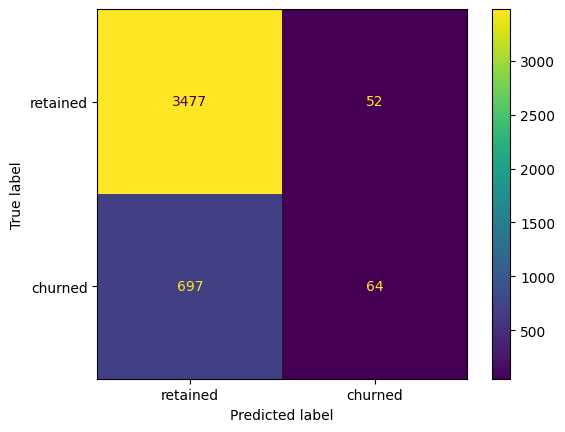

In [45]:
# Display the confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["retained", "churned"])
disp.plot()
plt.show()

## **Part 3: Interpret Model and Highlight Key Findings**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

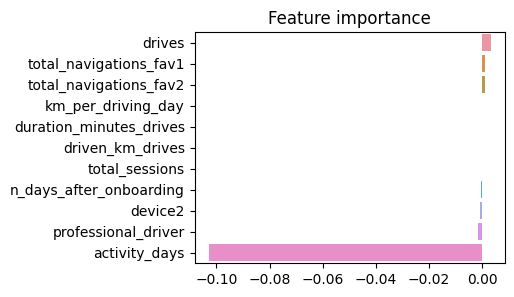

In [46]:
# First create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Plot feature importances
plt.figure(figsize=(4, 3))
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance')
plt.show()

**KEY FINDINGS**

1. The variable that most influenced the model's prediction was "activity_days", with a coefficient of about -0.1, representing a 0.1 decrease in the log-odds of y=1 for every unit increase in activity_days. This means that the number of days a user engages with the Waze app, the less likely they are to churn.

2. Other predictors have a negligible importance.

3. Overall, with a precision of 55% and a recall of 8%, this model is not deployable. The primary purpose of the model is to predict user churn, and it not able to do this.

4. Although some of the model's findings can be applied to the next stage of the project, it highlights a serious need for further information to be gathered on user engagement with the app, as well as other user information (e.g., dates, geography, time of day).
